In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!apt-get update
!apt-get install g++ openjdk-8-jdk

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:14 http://ppa.lau

In [5]:
!pip install JPype1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install rhinoMorph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 4.4 MB/s 


In [7]:
path="/content/gdrive/MyDrive/pytest/"

In [8]:
def read_data(filename, encoding='cp949'): 
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:] 
  return data
def write_data(data, filename, encoding='cp949'):
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)
data = read_data(path+'ratings_morphed.txt' , encoding='cp949')

In [9]:
data = read_data(path+'ratings_morphed.txt' , encoding='cp949')
print(len(data))
print(len(data[0])) 
print(data[0])


492
3
['8132799', '디자인 배우다 학생 외국 디자이너 와 일군 전통 통하다 발전하다 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 감사하다', '1']


In [10]:
data = read_data(path+'ratings_morphed.txt', encoding='cp949')
print(len(data)) 
print(len(data[0]))
data_text = [line[1] for line in data] 
data_senti = [line[2] for line in data]

492
3


In [13]:
mergedText=' '.join(data_text)
mergedTextList=mergedText.split(' ')

In [14]:
mergedTextList

['디자인',
 '배우다',
 '학생',
 '외국',
 '디자이너',
 '와',
 '일군',
 '전통',
 '통하다',
 '발전하다',
 '문화',
 '산업',
 '부럽다',
 '사실',
 '우리나라',
 '그',
 '어렵다',
 '시절',
 '끝',
 '열정',
 '지키다',
 '노라노',
 '같다',
 '전통',
 '있다',
 '같다',
 '사람',
 '꿈',
 '꾸다',
 '이루다',
 '나가다',
 '감사하다',
 '폴리스스토리',
 '시리즈',
 '뉴',
 '없다',
 '최고',
 '와',
 '연기',
 '진짜',
 '쩔다',
 '지루하다',
 '생각하다',
 '몰입하다',
 '그래',
 '이런',
 '진짜',
 '영화',
 '안개',
 '자욱하다',
 '밤하늘',
 '뜨다',
 '초승달',
 '같다',
 '영화',
 '사랑',
 '해보다',
 '사람',
 '처음',
 '끝',
 '웃다',
 '영화',
 '완전',
 '감동',
 '다시다',
 '감동',
 '개',
 '전쟁',
 '나오다',
 '나오다',
 '빠',
 '보다',
 '굿',
 '바보',
 '병',
 '나이',
 '같다',
 '영화',
 '지금',
 '보다',
 '감동',
 '하지만',
 '훗날',
 '다시',
 '보다',
 '대사',
 '하나하나',
 '그',
 '감정',
 '완벽하다',
 '이해하다',
 '같다',
 '재미있다',
 '고질라',
 '무',
 '귀엽다',
 'ㅋㅋ',
 '영화',
 '오페라',
 '작품',
 '극단',
 '평',
 '갈리다',
 '어쩌다',
 '없다',
 '반전',
 '좋다',
 '^^',
 '평점',
 '왜',
 '낮다',
 '긴장감',
 '스릴감',
 '진짜',
 '최고',
 '진짜',
 '전장',
 '느끼다',
 '공포',
 '생생하다',
 '전하다',
 '네고시에이터',
 '소재',
 '만',
 '같다',
 '아무런',
 '관련',
 '없다',
 '단연',
 '최고',
 '가면',
 '갈수록',
 '더욱',
 '빠지다',
 '밀회',
 '화이팅',


In [16]:
stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", "사람", "이", "보다", "한", "때", "년", "같다", "대하다", "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다", "받다", "그렇다", "알다", "사회", "더", "그녀", "문제", "오다", "그리고", "크다", "속"]


In [27]:
mergedTextList_no_stopwords = [word for word in mergedTextList if not word in stopwords_ko]
print('mergedTextList without stopwords:', mergedTextList_no_stopwords)
print('불용어 제거 전 길이:', len(mergedTextList))
print('불용어 제거 후 길이:', len(mergedTextList_no_stopwords))

mergedTextList without stopwords: ['디자인', '배우다', '학생', '외국', '디자이너', '와', '일군', '전통', '통하다', '발전하다', '문화', '산업', '부럽다', '사실', '우리나라', '어렵다', '시절', '끝', '열정', '지키다', '노라노', '전통', '꿈', '꾸다', '이루다', '나가다', '감사하다', '폴리스스토리', '시리즈', '뉴', '최고', '와', '연기', '진짜', '쩔다', '지루하다', '생각하다', '몰입하다', '그래', '이런', '진짜', '영화', '안개', '자욱하다', '밤하늘', '뜨다', '초승달', '영화', '사랑', '해보다', '처음', '끝', '웃다', '영화', '완전', '감동', '다시다', '감동', '개', '전쟁', '나오다', '나오다', '빠', '굿', '바보', '병', '나이', '영화', '지금', '감동', '하지만', '훗날', '다시', '대사', '하나하나', '감정', '완벽하다', '이해하다', '재미있다', '고질라', '무', '귀엽다', 'ㅋㅋ', '영화', '오페라', '작품', '극단', '평', '갈리다', '어쩌다', '반전', '좋다', '^^', '평점', '왜', '낮다', '긴장감', '스릴감', '진짜', '최고', '진짜', '전장', '느끼다', '공포', '생생하다', '전하다', '네고시에이터', '소재', '만', '아무런', '관련', '단연', '최고', '가면', '갈수록', '더욱', '빠지다', '밀회', '화이팅', '어', '상당하다', '수작', '일본', '영화', '최고', '마음', '들다', '강렬하다', '임팩트', '일품', '오랜만', '제대로', '범죄', '스릴러', '그런', '때가다', '사랑하다', '도', '그저', '좋아하다', '마디', '꺼내다', '벅차다', '밤', '잠', '설치다', '교복', '남다', '션', '자', '볼펜',

In [19]:
linedata=''.join(mergedTextList)
print(linedata)

디자인배우다학생외국디자이너와일군전통통하다발전하다문화산업부럽다사실우리나라그어렵다시절끝열정지키다노라노같다전통있다같다사람꿈꾸다이루다나가다감사하다폴리스스토리시리즈뉴없다최고와연기진짜쩔다지루하다생각하다몰입하다그래이런진짜영화안개자욱하다밤하늘뜨다초승달같다영화사랑해보다사람처음끝웃다영화완전감동다시다감동개전쟁나오다나오다빠보다굿바보병나이같다영화지금보다감동하지만훗날다시보다대사하나하나그감정완벽하다이해하다같다재미있다고질라무귀엽다ㅋㅋ영화오페라작품극단평갈리다어쩌다없다반전좋다^^평점왜낮다긴장감스릴감진짜최고진짜전장느끼다공포생생하다전하다네고시에이터소재만같다아무런관련없다단연최고가면갈수록더욱빠지다밀회화이팅어생각없다보다상당하다수작일본영화최고마음들다강렬하다임팩트일품오랜만보다제대로되다범죄스릴러그런때가다사랑하다도그저좋아하다하다마디말꺼내다벅차다밤잠설치다때교복남다션자볼펜자국역시미처다전하다못하다마음형태마지막씬잊다없다강압적용세뇌용서대하다비판중세시대명작굿평점왜이러하다영상존재하다죽기전꼭한번보다아름답다슬프다제니퍼코넬리눈부시다아역시절로버트드니로마지막웃다장면정말가슴속영원히기억되다최고명작사람어떻다저런짓하다는지ㅡㅡ보다다화나다인간잠재되다악마여러시간공간속존속하다이다큐엉뚱하다광적재현하다최고일동안쉬다틈틈잠줄이다여운남다실화더욱충격다시일어나다서다안되다경각심일깨우다영화존그렇게하다샴작품한보다가치농아인문대하다알다때재미있다이정친구우정매우감동굿굿굿또해라또하다제발ㅠㅠ아재미있다이말너무어울리다제이크질렌할대체못하다연기보다내내입가미소샤방샤방하다영화원표왜조연이양젤많이나오다ㅋㅋ재미있다마치바다속아쿠아리움속듣다느낌영화어린자녀강추정의세우다콜트노동자이야기이영화브라질가다마음사라지다남자영화내내마음울리다그리고좋아하다두여배우도법멤버모두기대다되다정말재미있다본영화액션최고남자라그렇다겁나다긴장감있다흥미진진하다ㄷㄷ그렇다워낙격투씬좋아하다ㅋㅋㅋ그냥생각없다집스마트티비보다재미있다보다무슨영화모르다암살나오다이정재걍보다ㅋㅋ하여튼너무재미있다인정하다인정하다년북한살만좋다왜목숨걸다대한민국오다어납득나불거리다종북박평식같다좋다같다년잊다수없다여되다비내리보이다시작하다반갑다얼굴ㅋㅋㅋ여주인공너무매력유쾌하다내용너

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # 폰트가 깨끗하게 보이도록 설정
!apt install fonts-nanum # 나눔 폰트 설치
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


디자인 배우다 학생 외국 디자이너 와 일군 전통 통하다 발전하다 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 감사하다 폴리스스토리 시리즈 뉴 없다 최고 와 연기 진짜 쩔다 지루하다 생각하다 몰입하다 그래 이런 진짜 영화 안개 자욱하다 밤하늘 뜨다 초승달 같다 영화 사랑 해보다 사람 처음 끝 웃다 영화 완전 감동 다시다 감동 개 전쟁 나오다 나오다 빠 보다 굿 바보 병 나이 같다 영화 지금 보다 감동 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽하다 이해하다 같다 재미있다 고질라 무 귀엽다 ㅋㅋ 영화 오페라 작품 극단 평 갈리다 어쩌다 없다 반전 좋다 ^^ 평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생하다 전하다 네고시에이터 소재 만 같다 아무런 관련 없다 단연 최고 가면 갈수록 더욱 빠지다 밀회 화이팅 어 생각 없다 보다 상당하다 수작 일본 영화 최고 마음 들다 강렬하다 임팩트 일품 오랜만 보다 제대로 되다 범죄 스릴러 그런 때가다 사랑하다 도 그저 좋아하다 하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태 마지막 씬 잊다 없다 강압 적용 세뇌 용서 대하다 비판 중세 시대 명작 굿 평점 왜 이러하다 영상 존재하다 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억되다 최고 명작 사람 어떻다 저런 짓 하다 는지 ㅡㅡ 보다 다 화나다 인간 잠재되다 악마 여러 시간 공간 속 존속하다 이 다큐 엉뚱하다 광적 재현하다 최고 일 동안 쉬다 틈틈 잠 줄이다 여운 남다 실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화 존 그렇게 하다 샴 작품 한 보다 가치 농아 인문 대하다 알다 때 재미있다 이정 친구 우정 매우 감동 굿 굿 굿 또 해라 또 하다 제발 ㅠㅠ 아 재미있다 이 말 너무 어울리다 제이크 질렌할 대체 못하다 

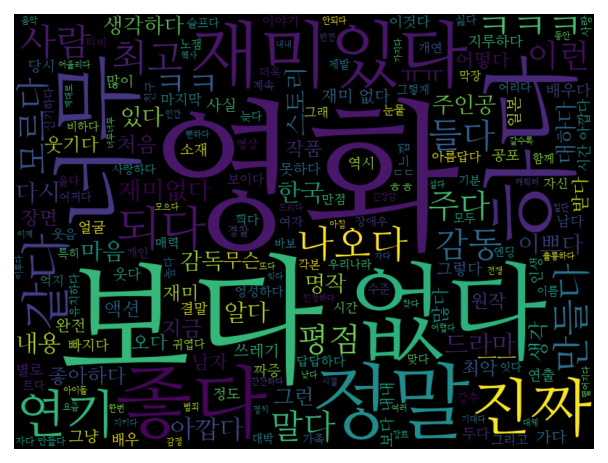

In [30]:
linedata=' '.join(mergedTextList)
print(linedata)
!pip install wordcloud
from wordcloud.wordcloud import WordCloud
cloud=WordCloud(font_path=fontpath, width=800, height=600).generate(linedata)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()